<a href="https://colab.research.google.com/github/PriyanshuRao-code/AI-Lab-Project/blob/Priyanshu-Rao/team_24_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Don't do anything here. It is just a setup.
import os
import sys

repo_name = "AI-Lab-Project"
repo_url = "https://github.com/PriyanshuRao-code/AI-Lab-Project.git"
repo_path = f"/content/{repo_name}"
branch_name = "Priyanshu-Rao"

if os.path.exists(repo_path):
    print("Repository already exists at:", repo_path)
else:
    print("🚀 Cloning the repository...")
    os.system(f"git clone --branch {branch_name} --single-branch {repo_url}")

os.chdir(repo_path)
sys.path.append(repo_path)

print("Repository is ready to use at:", repo_path)

🚀 Cloning the repository...
Repository is ready to use at: /content/AI-Lab-Project


In [2]:
# Start your code from here

In [3]:
import numpy as np
import pandas as pd

In [4]:
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
import seaborn as sns
import scipy.stats as stats
from datetime import datetime

In [5]:
df = pd.read_csv('24.csv')

In [6]:
print(df.columns.to_list())

['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)', 'Est Dia in Miles(min)', 'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date', 'Epoch Date Close Approach', 'Relative Velocity km per sec', 'Relative Velocity km per hr', 'Miles per hour', 'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body', 'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity', 'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant', 'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance', 'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly', 'Mean Motion', 'Equinox', 'Hazardous']


In [7]:
df["Neo Reference ID"].equals(df['Name'])

True

In [8]:
for col in df.columns:
  if df[col].nunique() ==1:
    print(f"Column: {col} is safe to drop")

Column: Orbiting Body is safe to drop
Column: Equinox is safe to drop


In [9]:
duplicate_list = df["Name"][df["Name"].duplicated()].unique()
print(duplicate_list)

[3666785 3373683 2489486 3514891 3645649 2003362 3551168 3736387 3102683
 2136818 2443103 3273782 2483656 3775199 2277810 2429736 3170221 3701883
 2365449 3763275 3432642 3358222 2162854 3182823 3025767 2488490 3716433
 3781651 2307070 3755345 3752441 2033342 3738913 3608784 3752445 2469219
 3761271 2162173 3773650 3279740 3455137 3751815 2363505 3773594 3761750
 3748472 2053409 2401954 3306214 2137099 3102681 3363380 2461353 2162361
 3426410 3653683 2486692 3394543 2458418 3623682 3709252 3752517 2395289
 3771633 2267223 3646599 3648862 2482796 2088254 2417655 3714553 2005604
 3662637 2189630 3743902 2369984 3312033 2469929 2004769 2356991 3081292
 3266944 3745113 3143084 3154513 2467352 3102762 3404494 3684008 3117446
 3117468 3072196 3092296 3125003 3768016 3774009 3068066 3120890 2488580
 3261402 2481025 3686271 2472263 3771017 2367943 3558387 3766334 3603128
 3354740 3549618 3065824 3408650 3764727 3307228 2345722 3025766 3276398
 2052381 2267221 3552523 3463371 3743123 3388356 36

In [10]:
df["Name"][df["Name"].duplicated()]

,Name
134,3666785
147,3373683
150,2489486
194,3514891
248,3645649
...,...
4667,3608622
4668,3475236
4678,3358223
4680,3608620


In [11]:
df[df["Name"] ==3662283]

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
3849,3662283,3662283,20.7,0.192555,0.430566,192.555078,430.566244,0.119648,0.267541,631.742403,...,145.035928,814.019755,0.592216,110.72021,2.82014,2.457597e+06,178.503886,0.44225,J2000,False
4681,3662283,3662283,20.7,0.192555,0.430566,192.555078,430.566244,0.119648,0.267541,631.742403,...,145.035928,814.019755,0.592216,110.72021,2.82014,2.457597e+06,178.503886,0.44225,J2000,False


In [12]:
row1 = df.iloc[3849]
row2 = df.iloc[4681]

diff = row1 != row2

diff_list = diff.index[diff.values == True].tolist()

for list1 in diff_list:
  print(f"Difference in {list1} is {df.iloc[3849][list1]}")
  print(f"Difference in {list1} is {df.iloc[4681][list1]}")
  print("\n\n")

Difference in Close Approach Date is 2014-03-08
Difference in Close Approach Date is 2016-09-08



Difference in Epoch Date Close Approach is 1394265600000
Difference in Epoch Date Close Approach is 1473318000000



Difference in Relative Velocity km per sec is 17.4309711929
Difference in Relative Velocity km per sec is 26.0160578577



Difference in Relative Velocity km per hr is 62751.4962944688
Difference in Relative Velocity km per hr is 93657.8082878237



Difference in Miles per hour is 38991.3394614159
Difference in Miles per hour is 58195.3198219536



Difference in Miss Dist.(Astronomical) is 0.265947832
Difference in Miss Dist.(Astronomical) is 0.1675637506



Difference in Miss Dist.(lunar) is 103.453704834
Difference in Miss Dist.(lunar) is 65.1822967529



Difference in Miss Dist.(kilometers) is 39785228.0
Difference in Miss Dist.(kilometers) is 25067180.0



Difference in Miss Dist.(miles) is 24721394.0
Difference in Miss Dist.(miles) is 15576024.0





In [13]:
print(f"Shape of df: {df.shape}")
df_another = df.drop_duplicates()
print(f"Shape of df after removing duplicates: {df_another.shape}")
print(f"Duplicate count : {df.duplicated().sum()}")

Shape of df: (4687, 40)
Shape of df after removing duplicates: (4687, 40)
Duplicate count : 0


In [14]:
diff_set1 = set()

# Grouping by 'Name' to compare only within same Names
grouped1 = df.groupby("Name")

for name, group in grouped1:
    if group["Hazardous"].nunique() > 1:  # Check if 'Hazardous' has different values
        for i in range(len(group) - 1):
            row1 = group.iloc[i]
            for j in range(i + 1, len(group)):
                row2 = group.iloc[j]

                diff = row1 != row2
                diff_columns = diff.index[diff.values == True].tolist()

                diff_set1.update(diff_columns)

print(f"Columns which are different when 2 'Name's  are same but 'Hazardous' is different - \n{diff_set1}")


Columns which are different when 2 'Name's  are same but 'Hazardous' is different - 
set()


In [15]:
diff_set2 = set()
grouped2 = df.groupby("Name")
for name, group in grouped1:
    for i in range(len(group) - 1):
        row1 = group.iloc[i]
        for j in range(i + 1, len(group)):
            row2 = group.iloc[j]

            diff = row1 != row2
            diff_columns = diff.index[diff.values == True].tolist()

            diff_set2.update(diff_columns)

print(f"Columns which are different when 2 'Name's are same - \n{diff_set2}")

Columns which are different when 2 'Name's are same - 
{'Relative Velocity km per sec', 'Epoch Date Close Approach', 'Miles per hour', 'Miss Dist.(kilometers)', 'Close Approach Date', 'Relative Velocity km per hr', 'Miss Dist.(lunar)', 'Miss Dist.(miles)', 'Miss Dist.(Astronomical)'}


(Neo Reference ID, Name) -> Correlation: 1.0
(Est Dia in KM(min), Est Dia in KM(max)) -> Correlation: 1.0000000000000047
(Est Dia in KM(min), Est Dia in M(min)) -> Correlation: 1.0000000000000027
(Est Dia in KM(min), Est Dia in M(max)) -> Correlation: 0.9999999999999992
(Est Dia in KM(min), Est Dia in Miles(min)) -> Correlation: 1.0000000000000009
(Est Dia in KM(min), Est Dia in Miles(max)) -> Correlation: 1.0000000000000029
(Est Dia in KM(min), Est Dia in Feet(min)) -> Correlation: 1.0000000000000087
(Est Dia in KM(min), Est Dia in Feet(max)) -> Correlation: 1.0000000000000049
(Est Dia in KM(max), Est Dia in M(min)) -> Correlation: 0.9999999999999999
(Est Dia in KM(max), Est Dia in M(max)) -> Correlation: 1.000000000000003
(Est Dia in KM(max), Est Dia in Miles(min)) -> Correlation: 1.0000000000000002
(Est Dia in KM(max), Est Dia in Miles(max)) -> Correlation: 1.0000000000000007
(Est Dia in KM(max), Est Dia in Feet(min)) -> Correlation: 1.0000000000000036
(Est Dia in KM(max), Est Dia i

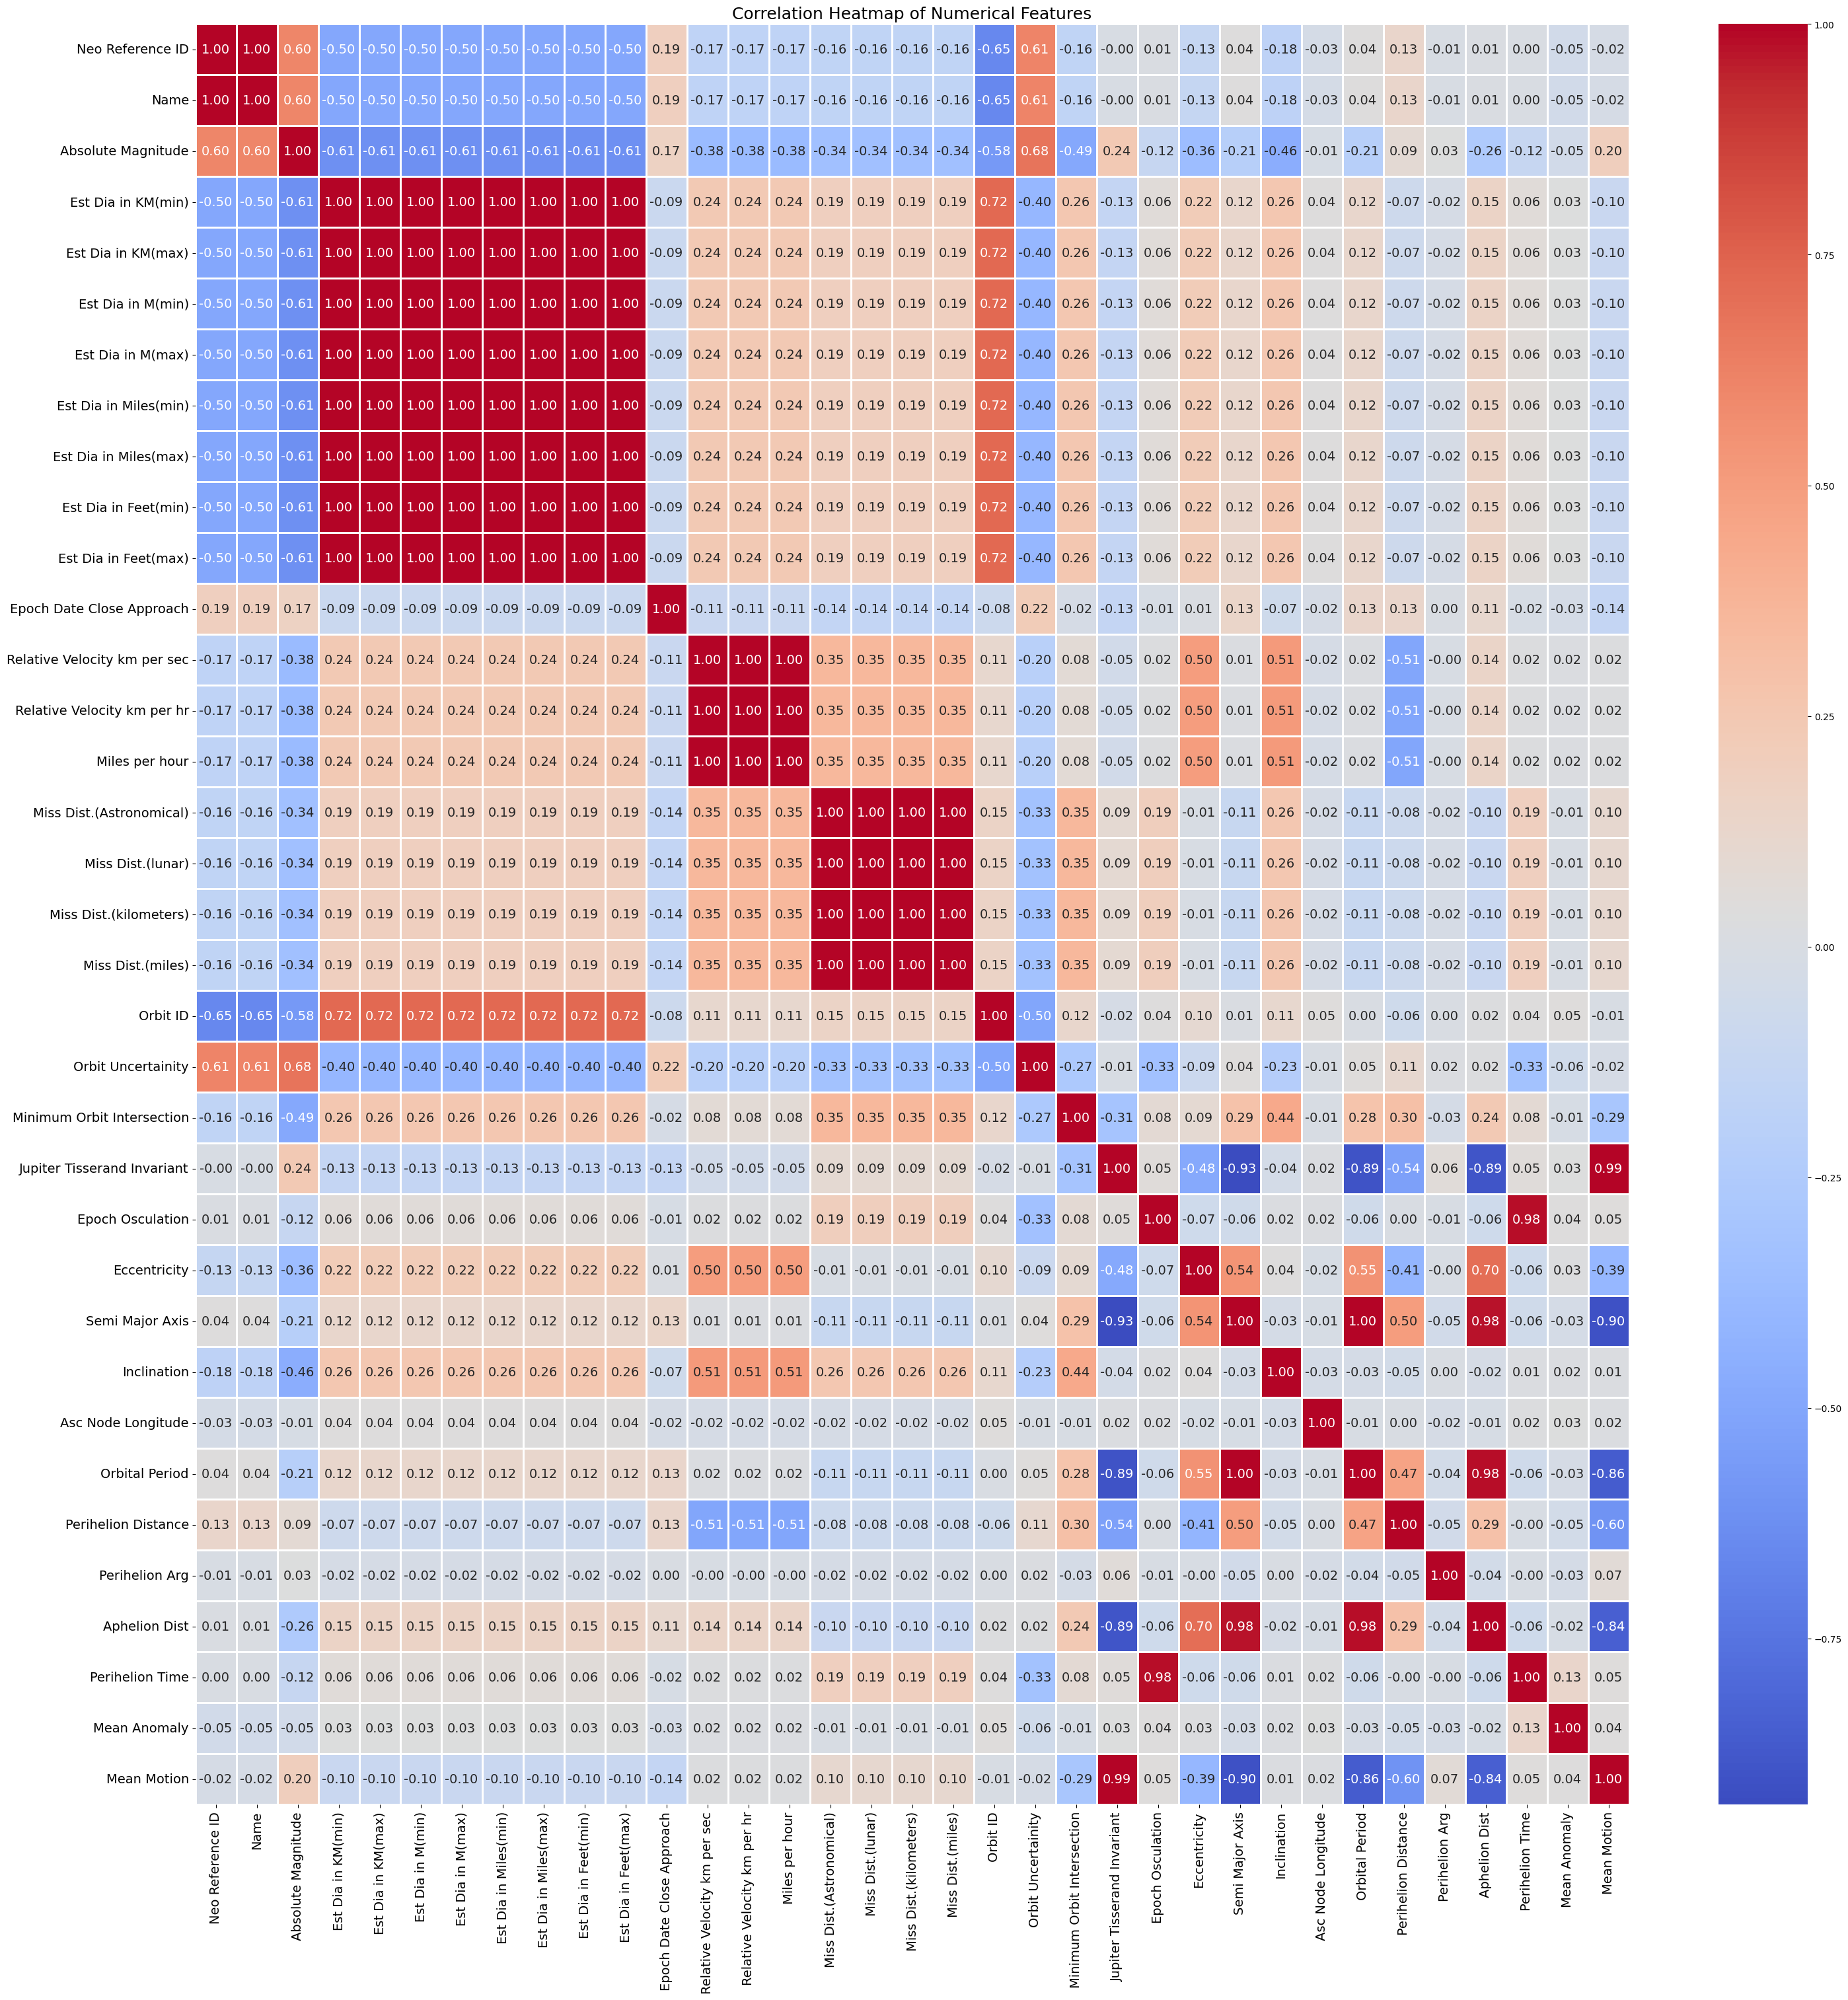

In [16]:
# Threshold for dropping column
threshold = 0.99

# Only numerical data
numerical_cols = df.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_cols.corr()

for i in range(len(correlation_matrix.columns)):
    for j in  range(i + 1, len(correlation_matrix.columns)):
        row = correlation_matrix.columns[i]
        col = correlation_matrix.columns[j]
        value = correlation_matrix.iloc[i, j]
        if abs(value) >=threshold:
          print(f"({row}, {col}) -> Correlation: {value}")



plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm", fmt=".2f", linewidths=1, annot_kws={"size": 14})
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


In [17]:
# Threshold defined above along with correlation matrix
to_drop = set()

# Extract upper triangle of correlation matrix
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]

        if abs(correlation_matrix.iloc[i, j]) >= threshold:
            to_drop.add(col2)  # Keep first, drop second

# Drop correlated columns
df_corr_reduced = numerical_cols.drop(columns=to_drop)
print("Dropped Columns:", to_drop)
print("Final DataFrame:")
# print(df_corr_reduced)
df_corr_reduced

Dropped Columns: {'Est Dia in KM(min)', 'Est Dia in M(max)', 'Semi Major Axis', 'Jupiter Tisserand Invariant', 'Miss Dist.(lunar)', 'Neo Reference ID', 'Est Dia in KM(max)', 'Est Dia in Miles(max)', 'Relative Velocity km per sec', 'Est Dia in M(min)', 'Miss Dist.(kilometers)', 'Est Dia in Feet(min)', 'Relative Velocity km per hr', 'Est Dia in Miles(min)', 'Miss Dist.(Astronomical)'}
Final DataFrame:


,Name,Absolute Magnitude,Est Dia in Feet(max),Epoch Date Close Approach,Miles per hour,Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Epoch Osculation,Eccentricity,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,21.600,933.308089,788947200000,13680.509944,3.899334e+07,17,5,0.025282,2458000.5,0.425549,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,21.300,1071.581063,788947200000,40519.173105,3.560342e+07,21,3,0.186935,2458000.5,0.351674,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,20.300,1698.341531,789552000000,16979.661798,4.736658e+06,22,0,0.043058,2458000.5,0.348248,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,27.400,64.569144,790156800000,24994.839864,2.652237e+07,7,6,0.005512,2458000.5,0.216578,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,21.600,933.308089,790156800000,22012.954985,3.791037e+07,25,1,0.034798,2458000.5,0.210448,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,23.900,323.612307,1473318000000,49556.875548,3.844741e+06,4,8,0.019777,2457637.5,0.361512,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436
4683,3759295,28.200,44.670934,1473318000000,7214.337772,6.013211e+05,2,6,0.006451,2458000.5,0.073200,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,3759714,22.700,562.373736,1473318000000,16086.983633,5.671115e+06,17,6,0.059972,2458000.5,0.368055,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,3759720,21.800,851.187094,1473318000000,25393.489071,2.423912e+07,6,5,0.177510,2458000.5,0.202565,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


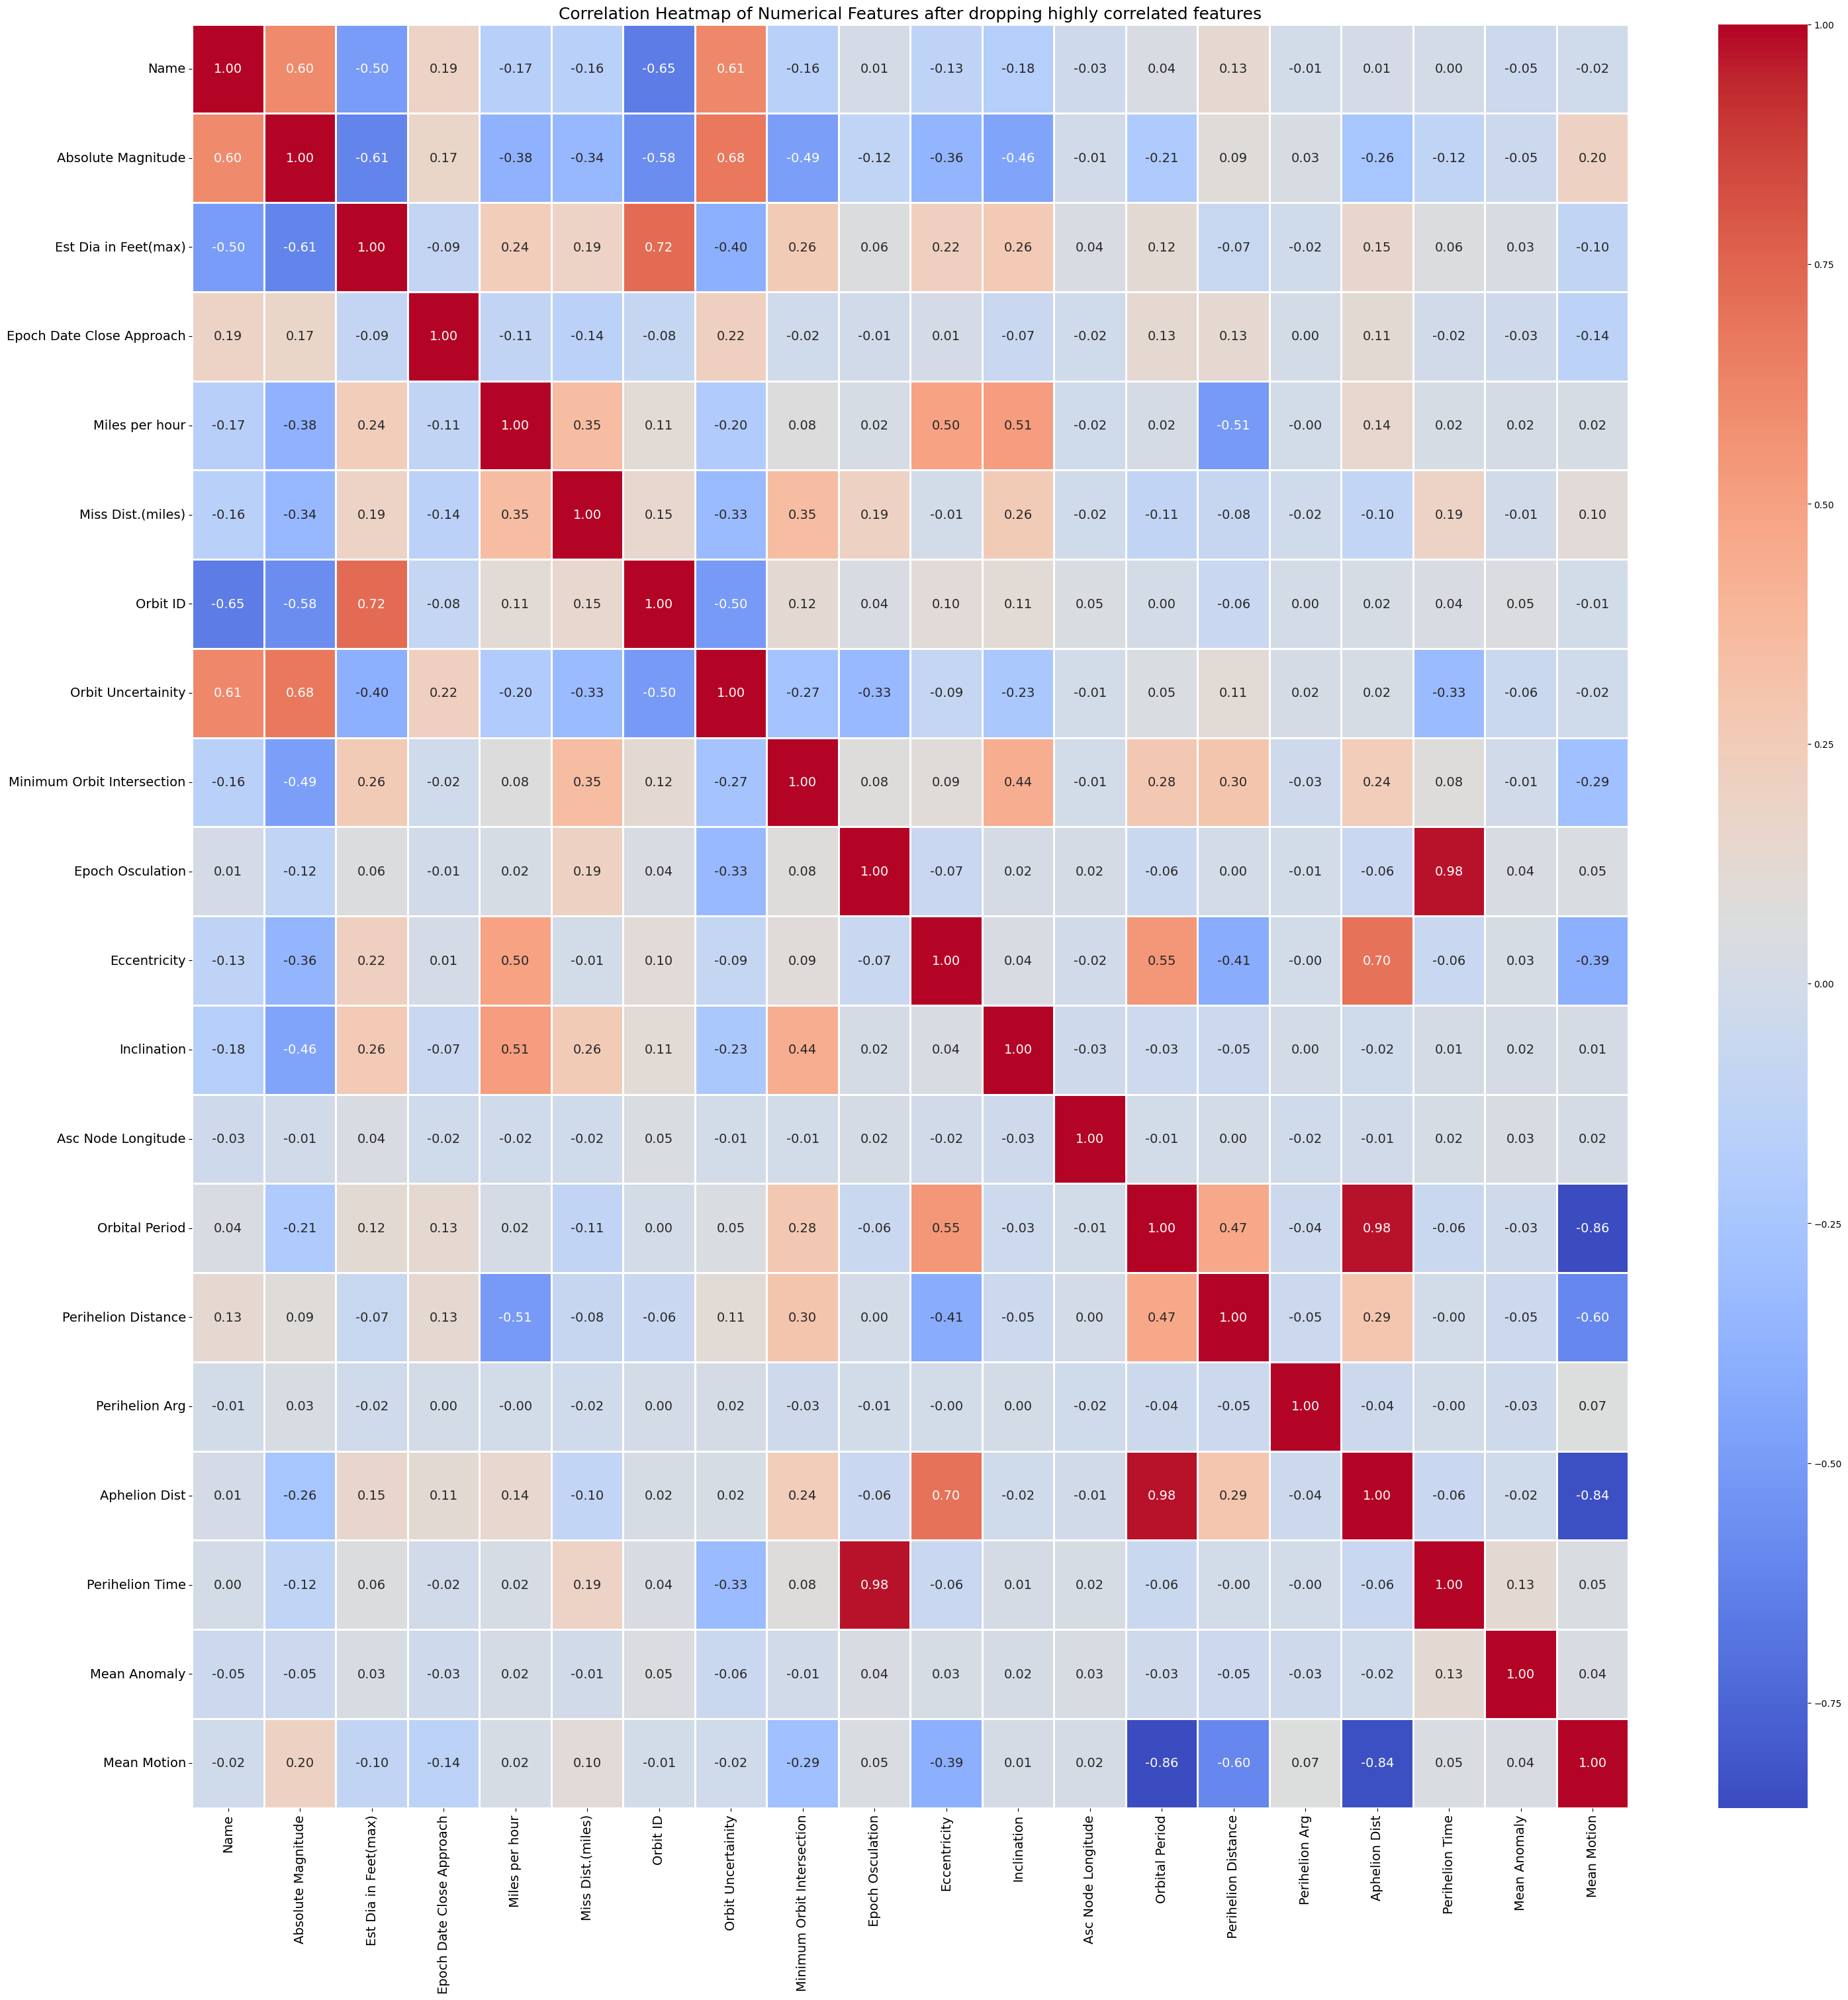

In [18]:
# Correlation matrix after dropping the columns where threshold remains same
correlation_matrix = df_corr_reduced.corr()

for i in range(len(correlation_matrix.columns)):
    for j in  range(i + 1, len(correlation_matrix.columns)):
        row = correlation_matrix.columns[i]
        col = correlation_matrix.columns[j]
        value = correlation_matrix.iloc[i, j]
        if value >=threshold:
          print(f"({row}, {col}) -> Correlation: {value}")

plt.figure(figsize=(35, 35))
sns.heatmap(correlation_matrix, annot=True,cmap="coolwarm", fmt=".2f", linewidths=1, annot_kws={"size": 14})
plt.title("Correlation Heatmap of Numerical Features after dropping highly correlated features", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

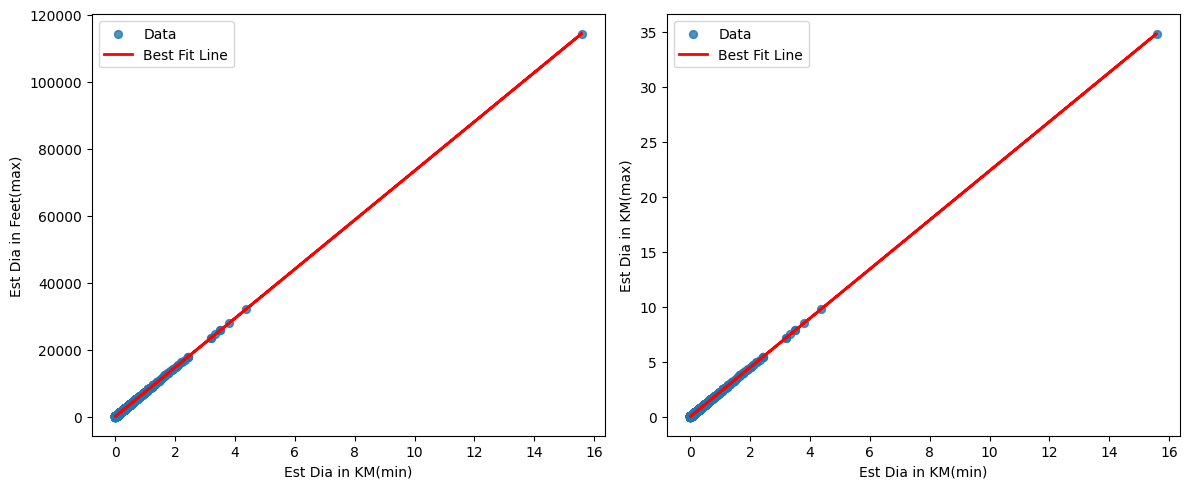

In [19]:
# Visualization if really the correlation is too high
X1 = df[['Est Dia in KM(min)']]
y1 = df[['Est Dia in Feet(max)']]

X2 = df[['Est Dia in KM(min)']]
y2 = df['Est Dia in KM(max)']

plt.figure(figsize=(12, 5))

# Linear Regression Model
model = LinearRegression()
model.fit(X1, y1)

# Plot Regression Line
plt.subplot(1, 2, 1)
plt.scatter(X1, y1, s=32, alpha=0.8, label="Data")
plt.plot(X1, model.predict(X1), color='red', linewidth=2, label="Best Fit Line")
plt.xlabel('Est Dia in KM(min)')
plt.ylabel('Est Dia in Feet(max)')
plt.legend()

model = LinearRegression()
model.fit(X2, y2)

# Plot Regression Line
plt.subplot(1, 2, 2)
plt.scatter(X2, y2, s=32, alpha=0.8, label="Data")
plt.plot(X2, model.predict(X2), color='red', linewidth=2, label="Best Fit Line")
plt.xlabel('Est Dia in KM(min)')
plt.ylabel('Est Dia in KM(max)')
plt.legend()

plt.tight_layout()
plt.show()

In [20]:
df_copy1 = df[['Name', 'Close Approach Date']].copy()

unique_approaches = df_copy1.drop_duplicates()

total_unique_asteroids = df['Name'].nunique()
total_unique_approaches = len(unique_approaches)

print(f"Total unique asteroids: {total_unique_asteroids}")
print(f"Total unique asteroid approach events: {total_unique_approaches}")

multiple_approaches = df_copy1['Name'].value_counts()
repeated_asteroids = multiple_approaches[multiple_approaches > 1]

print(f"\nTotal asteroids with multiple approaches: {len(repeated_asteroids)}")


df_copy2 = df[['Name', 'Close Approach Date', 'Hazardous']].copy()

hazardous_variation = df_copy2.groupby("Name")["Hazardous"].nunique()

# Select only those asteroids where Hazardous changes (i.e., has both 0 & 1 values)
changing_asteroids = hazardous_variation[hazardous_variation > 1].index.tolist()

print(f"Total asteroids changing hazardous status: {len(changing_asteroids)}")
print("Asteroids with changing hazardous status:")
print(changing_asteroids)

Total unique asteroids: 3692
Total unique asteroid approach events: 4687

Total asteroids with multiple approaches: 751
Total asteroids changing hazardous status: 0
Asteroids with changing hazardous status:
[]


## **Analysing 'Close Approach Date'**

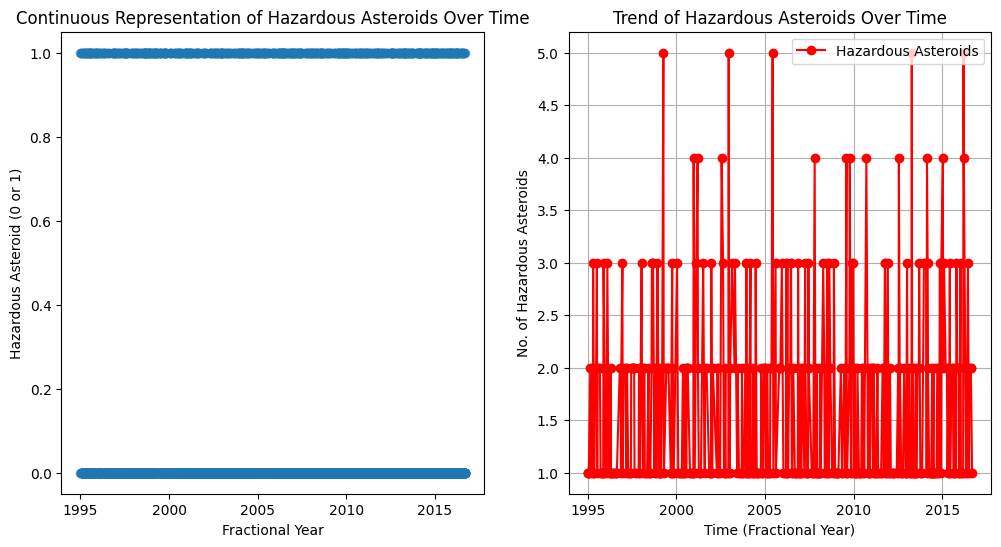

In [21]:
df_new = df[["Close Approach Date", "Hazardous"]].copy()

# Convert "Close Approach Date" to datetime (pandas datetime format datetime64[ns] )
df_new["Close Approach Date"] = pd.to_datetime(df_new["Close Approach Date"])

# Extract Year & Day of Year
df_new["Year"] = df_new["Close Approach Date"].dt.year
df_new["Day_of_Year"] = df_new["Close Approach Date"].dt.dayofyear

# Compute Fractional Year
df_new["Fractional_Year"] = df_new["Year"] + df_new["Day_of_Year"] / 365.25


plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(df_new["Fractional_Year"], df["Hazardous"], alpha=0.5)
plt.xlabel("Fractional Year")
plt.ylabel("Hazardous Asteroid (0 or 1)")
plt.title("Continuous Representation of Hazardous Asteroids Over Time")


# Count Hazardous Asteroids per Time Step
hazardous_trend = df_new[df_new["Hazardous"] == True].groupby("Fractional_Year").size()


plt.subplot(1, 2, 2)
plt.plot(hazardous_trend.index, hazardous_trend.values, marker="o", linestyle="-", color="red", label="Hazardous Asteroids")
plt.xlabel("Time (Fractional Year)")
plt.ylabel("No. of Hazardous Asteroids")
plt.title("Trend of Hazardous Asteroids Over Time")
plt.legend()
plt.grid(True)
plt.show()

#  Since we are using Fractional Year, the visualization is not very clear.
#  To improve clarity, we will analyze the Year and Month difference instead.

**Since we are using Fractional Year, the visualization is not very clear.
To improve clarity, we will analyze the Year and Month difference instead.**

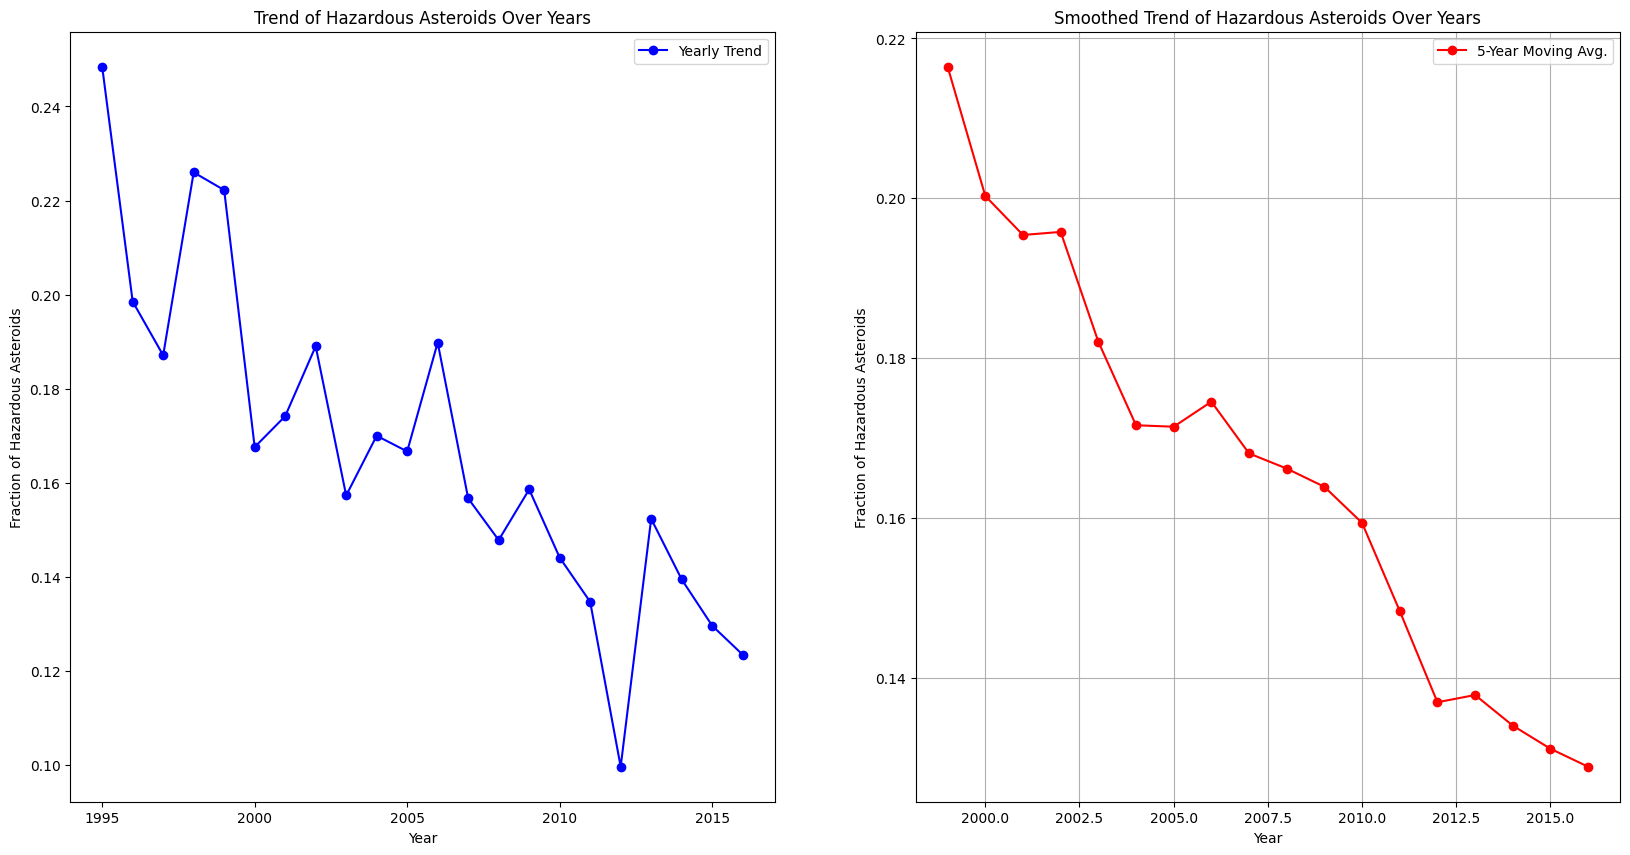

In [22]:
# Compute yearly average of hazardous asteroids
hazardous_trend1 = df_new.groupby("Year")["Hazardous"].mean()

hazardous_trend_smooth = df_new.groupby("Year")["Hazardous"].mean().rolling(5).mean()

# Plot the trend
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(hazardous_trend1.index, hazardous_trend1.values, marker="o", linestyle="-", color="blue", label="Yearly Trend")
plt.xlabel("Year")
plt.ylabel("Fraction of Hazardous Asteroids")
plt.title("Trend of Hazardous Asteroids Over Years")
plt.legend()


# Compute rolling average for a smoother trend

plt.subplot(1, 2, 2)
plt.plot(hazardous_trend_smooth.index, hazardous_trend_smooth.values, marker="o", linestyle="-", color="red", label="5-Year Moving Avg.")
plt.xlabel("Year")
plt.ylabel("Fraction of Hazardous Asteroids")
plt.title("Smoothed Trend of Hazardous Asteroids Over Years")
plt.legend()
plt.grid(True)
plt.show()

**PEARSON CORRELATION COEFFICIENT**

In [23]:
# PEARSON CORRELATION COEFFICIENT
print("Correlations according to Pearson correlation coefficient\n")

# Grouping Year-wise and resetting index to align dimensions
df_grouped = df_new.groupby("Year")["Hazardous"].mean().reset_index()

# Extracting Year and Hazardous Fraction
x1 = df_grouped["Year"]
y1 = df_grouped["Hazardous"]

# Pearson Correlation Test
corr1, p_value1 = stats.pearsonr(x1, y1)

print(f"Correlation: {corr1:.4f}, P-value: {p_value1:.4f}")

print("Correlation of month with hazardous is:")
if p_value1 >= 0.05:
    print("Correlation is not statistically significant (not reliable), even if the coefficient is high.\n")
elif corr1 >= 0.6:
    print("Strong positive correlation.\n")
elif corr1 <= -0.6:
    print("Strong negative correlation.\n")
elif 0.3 <= corr1 < 0.6:
    print("Moderate positive correlation.\n")
elif -0.6 < corr1 <= -0.3:
    print("Moderate negative correlation.\n")
elif 0 <= corr1 < 0.3:
    print("Weak positive correlation.\n")
elif -0.3 < corr1 <= 0:
    print("Weak negative correlation.\n")
else:
    print("No correlation.\n")


# Doing for Month....
df_new["Month"] = df_new["Close Approach Date"].dt.month
df_grouped = df_new.groupby("Month")["Hazardous"].mean().reset_index()

# Extracting Year and Hazardous Fraction
x2 = df_grouped["Month"]
y2 = df_grouped["Hazardous"]

# Pearson Correlation Test
corr2, p_value2 = stats.pearsonr(x2, y2)

print(f"Correlation: {corr2:.4f}, P-value: {p_value2:.4f}")


print("Correlation of month with hazardous is:")
if p_value2 >= 0.05:
    print("Correlation is not statistically significant (not reliable), even if the coefficient is high.")
elif corr2 >= 0.6:
    print("Strong positive correlation.")
elif corr2 <= -0.6:
    print("Strong negative correlation.")
elif 0.3 <= corr2 < 0.6:
    print("Moderate positive correlation.")
elif -0.6 < corr2 <= -0.3:
    print("Moderate negative correlation.")
elif 0 <= corr2 < 0.3:
    print("Weak positive correlation.")
elif -0.3 < corr2 <= 0:
    print("Weak negative correlation.")
else:
    print("No correlation.")


#    Pearson Correlation Interpretation:
#    - If corr ≥ 0.6 or corr ≤ -0.6 → Strong correlation
#    - If 0.3 ≤ corr < 0.6 or -0.6 < corr ≤ -0.3 → Moderate correlation
#    - If 0 ≤ corr < 0.3 or -0.3 < corr ≤ 0 → Weak correlation
#    - If p_value ≥ 0.05 → Correlation is not reliable, even if `corr` is high.


Correlations according to Pearson correlation coefficient

Correlation: -0.8599, P-value: 0.0000
Correlation of month with hazardous is:
Strong negative correlation.

Correlation: 0.1856, P-value: 0.5635
Correlation of month with hazardous is:
Correlation is not statistically significant (not reliable), even if the coefficient is high.


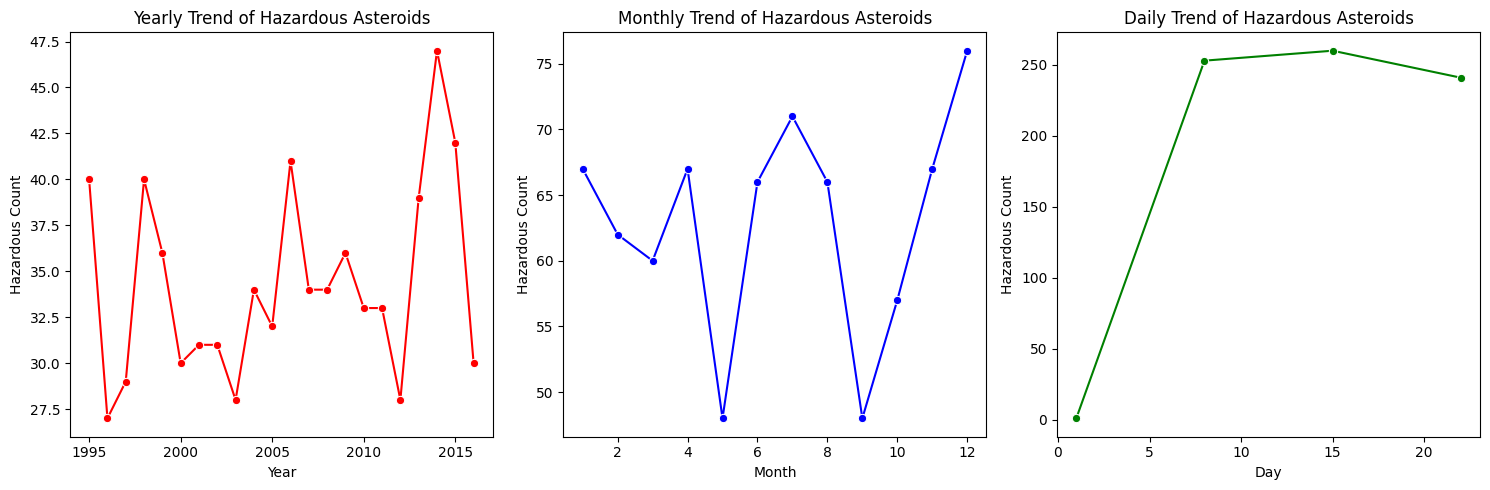

Chi-square test p-value (Yearly): 0.007075954481510147
Chi-square test p-value (Monthly): 0.0026963860293842145
Chi-square test p-value (Daily): 0.5610784626854572
Hazardous asteroids show **YEARLY** time dependency!
Hazardous asteroids show **MONTHLY** time dependency!
No significant daily dependency found.


In [24]:
temp_df = df.drop(columns=to_drop)

#  Convert "Close Approach Date" to datetime
temp_df["Close Approach Date"] = pd.to_datetime(temp_df["Close Approach Date"])

temp_df["Year"] = temp_df["Close Approach Date"].dt.year
temp_df["Month"] = temp_df["Close Approach Date"].dt.month
temp_df["Day"] = temp_df["Close Approach Date"].dt.day

#  Group by Year, Month, Day
hazard_yearly = temp_df.groupby("Year")["Hazardous"].sum()
hazard_monthly = temp_df.groupby("Month")["Hazardous"].sum()
hazard_daily = temp_df.groupby("Day")["Hazardous"].sum()

#  Plot Time vs Hazardous Asteroids
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.lineplot(x=hazard_yearly.index, y=hazard_yearly.values, marker="o", color="r")
plt.title("Yearly Trend of Hazardous Asteroids")
plt.xlabel("Year")
plt.ylabel("Hazardous Count")

plt.subplot(1, 3, 2)
sns.lineplot(x=hazard_monthly.index, y=hazard_monthly.values, marker="o", color="b")
plt.title("Monthly Trend of Hazardous Asteroids")
plt.xlabel("Month")
plt.ylabel("Hazardous Count")

plt.subplot(1, 3, 3)
sns.lineplot(x=hazard_daily.index, y=hazard_daily.values, marker="o", color="g")
plt.title("Daily Trend of Hazardous Asteroids")
plt.xlabel("Day")
plt.ylabel("Hazardous Count")

plt.tight_layout()
plt.show()

# Chi-Square Test
def chi_square_test(temp_df, time_col):
    contingency_table = pd.crosstab(temp_df[time_col], temp_df["Hazardous"])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

p_year = chi_square_test(temp_df, "Year")
p_month = chi_square_test(temp_df, "Month")
p_day = chi_square_test(temp_df, "Day")

# Printing results
print(f"Chi-square test p-value (Yearly): {p_year}")
print(f"Chi-square test p-value (Monthly): {p_month}")
print(f"Chi-square test p-value (Daily): {p_day}")

if p_year < 0.05:
    print("Hazardous asteroids show **YEARLY** time dependency!")
else:
    print("No significant yearly dependency found.")

if p_month < 0.05:
    print("Hazardous asteroids show **MONTHLY** time dependency!")
else:
    print("No significant monthly dependency found.")

if p_day < 0.05:
    print("Hazardous asteroids show **DAILY** time dependency!")
else:
    print("No significant daily dependency found.")


# A low p-value in Pearson but high in Chi-square suggests a strong linear correlation but weakened categorical association, possibly due to uneven class distribution or expected frequency issues in Chi-square.

A low p-value in Pearson but high in Chi-square suggests a strong linear correlation but weakened categorical association, possibly due to uneven class distribution or expected frequency issues in Chi-square.

# **Analysing 'Epoch Date Close Approach'**

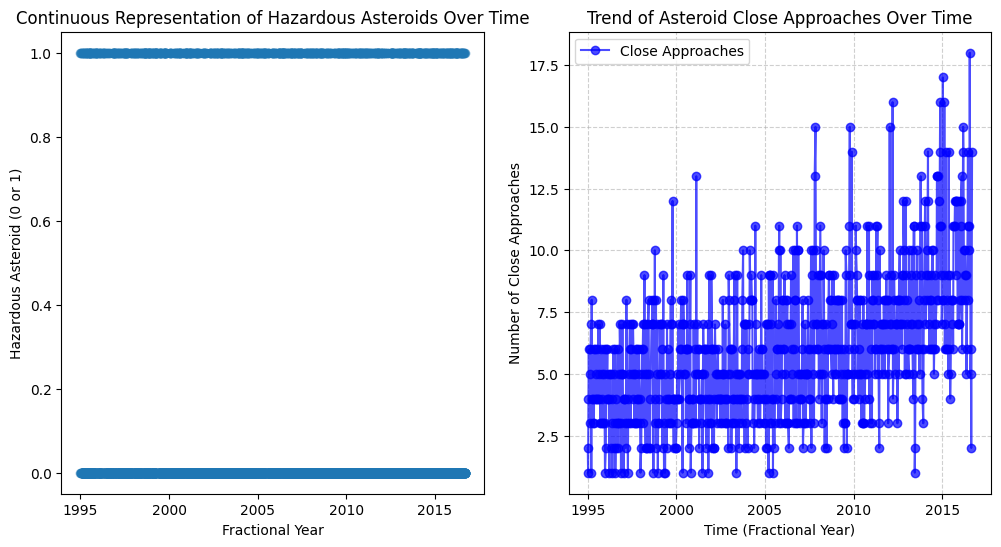

In [25]:

# Copy original dataframe
temp_df_copy = temp_df.copy()

temp_df_copy["Converted Date"] = temp_df_copy["Epoch Date Close Approach"].apply(
    lambda x: datetime.utcfromtimestamp(x / 1000) if pd.notnull(x) else None
)

# Extract Year & Day of Year for Fractional Year Calculation
temp_df_copy["Year"] = temp_df_copy["Converted Date"].dt.year
temp_df_copy["Day_of_Year"] = temp_df_copy["Converted Date"].dt.dayofyear

temp_df_copy["Fractional_Year"] = temp_df_copy["Year"] + temp_df_copy["Day_of_Year"] / 365.25

trend_data = temp_df_copy.groupby("Fractional_Year").size()

# Plot Trend
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(temp_df_copy["Fractional_Year"], temp_df_copy["Hazardous"], alpha=0.5)
plt.xlabel("Fractional Year")
plt.ylabel("Hazardous Asteroid (0 or 1)")
plt.title("Continuous Representation of Hazardous Asteroids Over Time")

# Plot Count of Asteroids Over Time
plt.subplot(1, 2, 2)
plt.plot(trend_data.index, trend_data.values, marker="o", linestyle="-", color="b", alpha=0.7, label="Close Approaches")
plt.xlabel("Time (Fractional Year)")
plt.ylabel("Number of Close Approaches")
plt.title("Trend of Asteroid Close Approaches Over Time")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()



**Since we are using Fractional Year, the visualization is not very clear.
To improve clarity, we will analyze the Year and Month difference instead.**

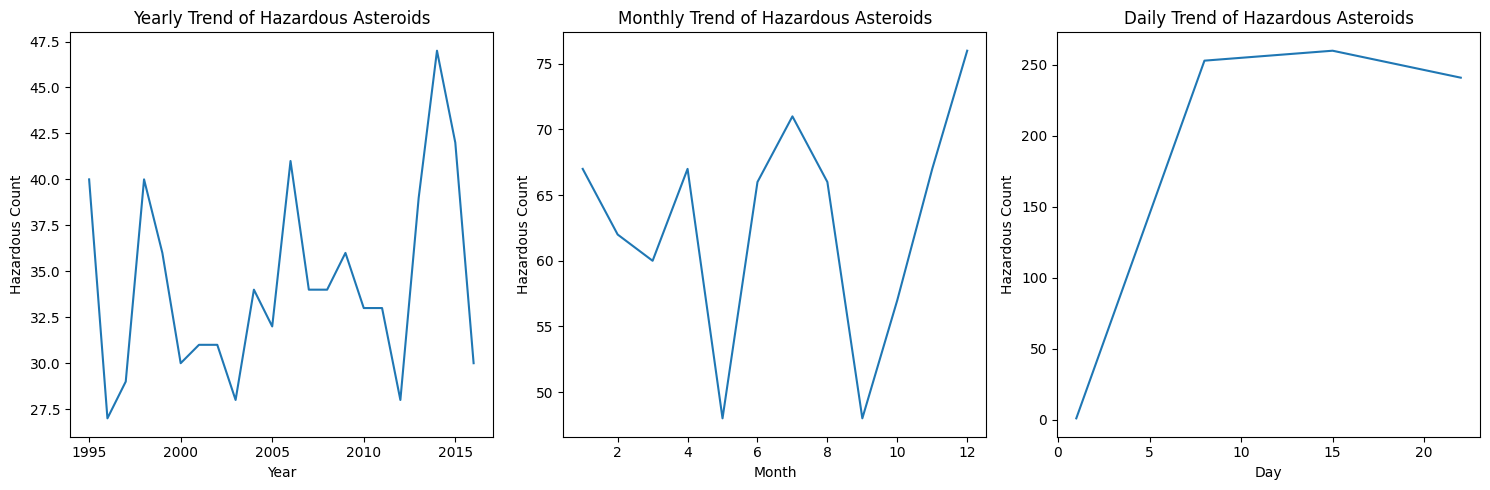

Chi-square test p-value (Yearly): 0.007075954481510147
Chi-square test p-value (Monthly): 0.0026963860293842145
Chi-square test p-value (Daily): 0.5610784626854572
Hazardous asteroids show YEARLY time dependency!
Hazardous asteroids show MONTHLY time dependency!
No significant DAILY dependency found.


In [26]:
temp_df["Converted Date"] = temp_df["Epoch Date Close Approach"].apply(
    lambda x: datetime.utcfromtimestamp(x / 1000) if pd.notnull(x) else None
)

# Pahle 5 rows dekhne ke liye
temp_df[["Epoch Date Close Approach", "Converted Date"]].head()


# Copying DataFrame to keep original unchanged
temp_df_copy = temp_df.copy()

temp_df_copy["Year"] = temp_df_copy["Converted Date"].dt.year
temp_df_copy["Month"] = temp_df_copy["Converted Date"].dt.month
temp_df_copy["Day"] = temp_df_copy["Converted Date"].dt.day

# Group by Year, Month, Day to check frequency of Hazardous asteroids
hazard_yearly = temp_df.groupby("Year")["Hazardous"].sum()
hazard_monthly = temp_df.groupby("Month")["Hazardous"].sum()
hazard_daily = temp_df.groupby("Day")["Hazardous"].sum()

# Plot Time vs Hazardous Asteroids
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.lineplot(x=hazard_yearly.index, y=hazard_yearly.values)
plt.title("Yearly Trend of Hazardous Asteroids")
plt.xlabel("Year")
plt.ylabel("Hazardous Count")

plt.subplot(1, 3, 2)
sns.lineplot(x=hazard_monthly.index, y=hazard_monthly.values)
plt.title("Monthly Trend of Hazardous Asteroids")
plt.xlabel("Month")
plt.ylabel("Hazardous Count")

plt.subplot(1, 3, 3)
sns.lineplot(x=hazard_daily.index, y=hazard_daily.values)
plt.title("Daily Trend of Hazardous Asteroids")
plt.xlabel("Day")
plt.ylabel("Hazardous Count")

plt.tight_layout()
plt.show()


# Chi-Square Test
def chi_square_test(feature):
    contingency_table = pd.crosstab(temp_df_copy[feature], temp_df_copy["Hazardous"])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    return p

# Perform Chi-Square test
p_year = chi_square_test("Year")
p_month = chi_square_test("Month")
p_day = chi_square_test("Day")

# Results
print(f"Chi-square test p-value (Yearly): {p_year}")
print(f"Chi-square test p-value (Monthly): {p_month}")
print(f"Chi-square test p-value (Daily): {p_day}")

# Interpretation
if p_year < 0.05:
    print("Hazardous asteroids show YEARLY time dependency!")
else:
    print("No significant YEARLY dependency found.")

if p_month < 0.05:
    print("Hazardous asteroids show MONTHLY time dependency!")
else:
    print("No significant MONTHLY dependency found.")

if p_day < 0.05:
    print("Hazardous asteroids show DAILY time dependency!")
else:
    print("No significant DAILY dependency found.")

# Should convert months into One Hot Encoding while using Non-linear Learning Algorithm such as Neural Networks

# **Analysis of Orbit Determination Date**

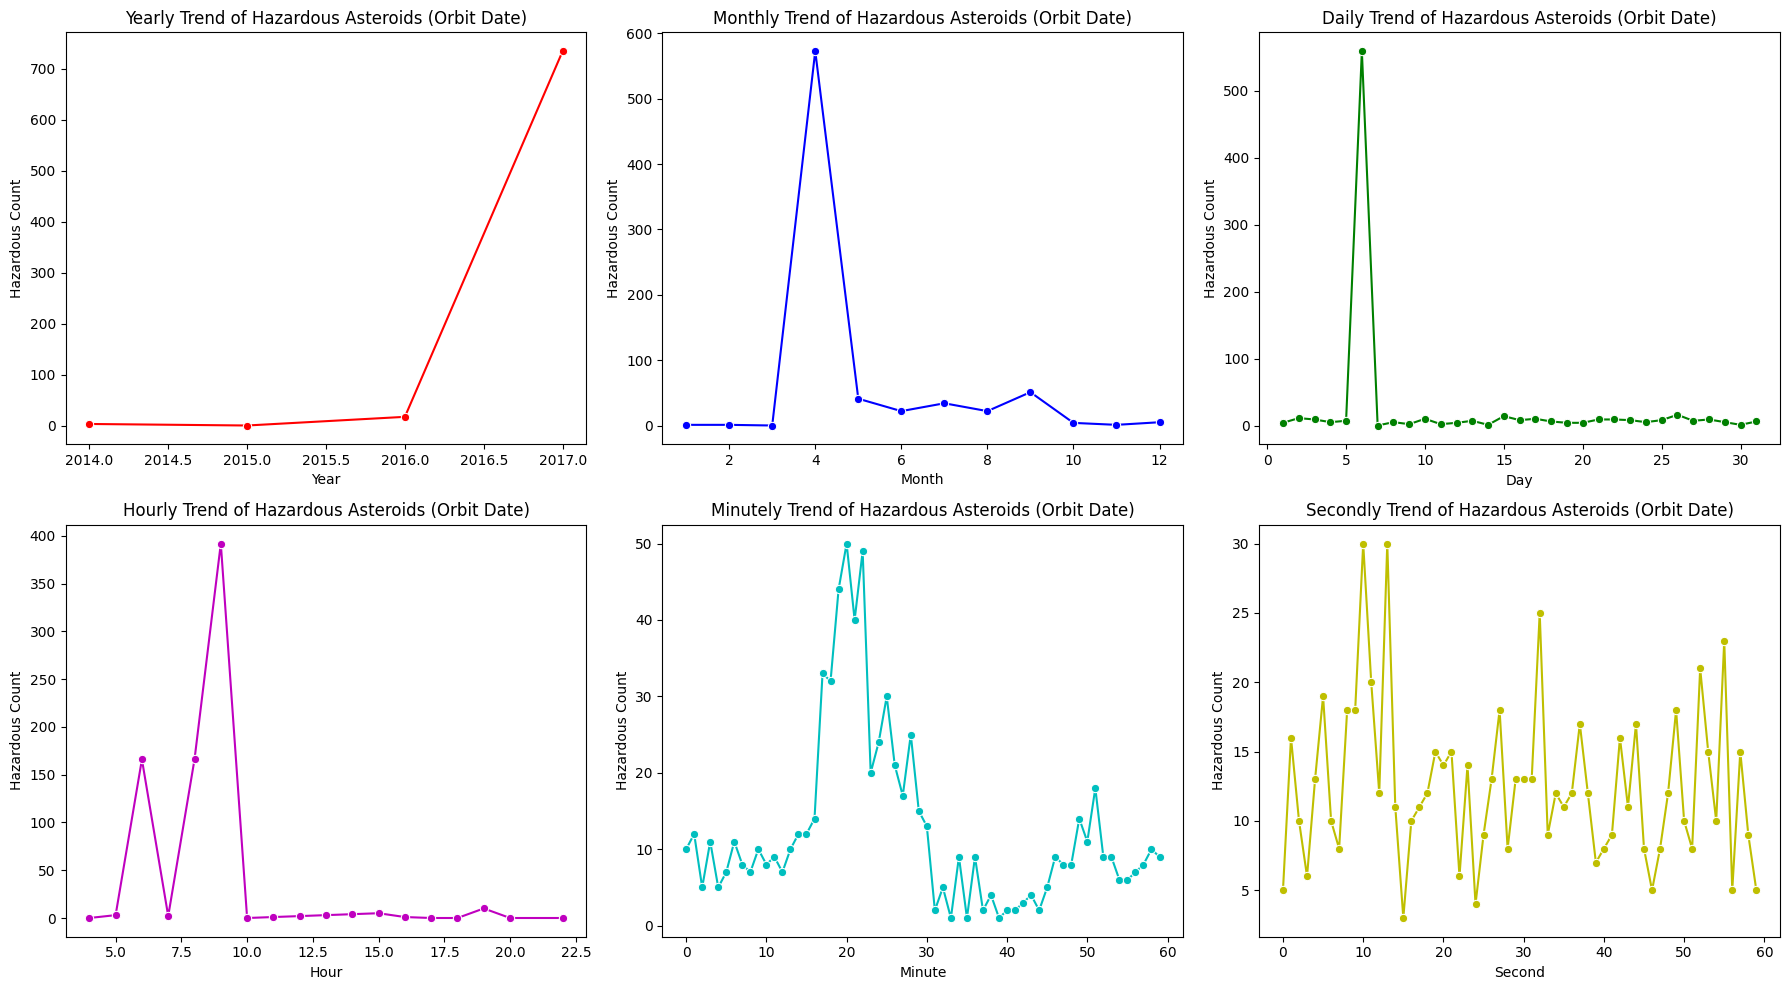

Chi-square test p-value (Orbit Yearly): 0.005155716107167093
Chi-square test p-value (Orbit Monthly): 1.3414627145484692e-11
Chi-square test p-value (Orbit Daily): 2.89424286963238e-11
Chi-square test p-value (Orbit Hourly): 4.7619880177464563e-35
Chi-square test p-value (Orbit Minutely): 2.9895630800004956e-14
Chi-square test p-value (Orbit Secondly): 5.04941448373893e-09
Hazardous asteroids show **YEARLY** time dependency in Orbit Determination Date!
Hazardous asteroids show **MONTHLY** time dependency in Orbit Determination Date!
Hazardous asteroids show **DAILY** time dependency in Orbit Determination Date!
Hazardous asteroids show **HOURLY** time dependency in Orbit Determination Date!
Hazardous asteroids show **MINUTELY** time dependency in Orbit Determination Date!
Hazardous asteroids show **SECONDLY** time dependency in Orbit Determination Date!


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Copy dataframe & Convert "Orbit Determination Date" to datetime
temp_df["Orbit Determination Date"] = pd.to_datetime(temp_df["Orbit Determination Date"])

# Extract Year, Month, Day, Hour, Minute, Second
temp_df["Orbit_Year"] = temp_df["Orbit Determination Date"].dt.year
temp_df["Orbit_Month"] = temp_df["Orbit Determination Date"].dt.month
temp_df["Orbit_Day"] = temp_df["Orbit Determination Date"].dt.day
temp_df["Orbit_Hour"] = temp_df["Orbit Determination Date"].dt.hour
temp_df["Orbit_Minute"] = temp_df["Orbit Determination Date"].dt.minute
temp_df["Orbit_Second"] = temp_df["Orbit Determination Date"].dt.second

# Group by Year, Month, Day, Hour, Minute, Second
orbit_yearly = temp_df.groupby("Orbit_Year")["Hazardous"].sum()
orbit_monthly = temp_df.groupby("Orbit_Month")["Hazardous"].sum()
orbit_daily = temp_df.groupby("Orbit_Day")["Hazardous"].sum()
orbit_hourly = temp_df.groupby("Orbit_Hour")["Hazardous"].sum()
orbit_minutely = temp_df.groupby("Orbit_Minute")["Hazardous"].sum()
orbit_secondly = temp_df.groupby("Orbit_Second")["Hazardous"].sum()

# Plot Time vs Hazardous Asteroids
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
sns.lineplot(x=orbit_yearly.index, y=orbit_yearly.values, marker="o", color="r")
plt.title("Yearly Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Year")
plt.ylabel("Hazardous Count")

plt.subplot(2, 3, 2)
sns.lineplot(x=orbit_monthly.index, y=orbit_monthly.values, marker="o", color="b")
plt.title("Monthly Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Month")
plt.ylabel("Hazardous Count")

plt.subplot(2, 3, 3)
sns.lineplot(x=orbit_daily.index, y=orbit_daily.values, marker="o", color="g")
plt.title("Daily Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Day")
plt.ylabel("Hazardous Count")

plt.subplot(2, 3, 4)
sns.lineplot(x=orbit_hourly.index, y=orbit_hourly.values, marker="o", color="m")
plt.title("Hourly Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Hour")
plt.ylabel("Hazardous Count")

plt.subplot(2, 3, 5)
sns.lineplot(x=orbit_minutely.index, y=orbit_minutely.values, marker="o", color="c")
plt.title("Minutely Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Minute")
plt.ylabel("Hazardous Count")

plt.subplot(2, 3, 6)
sns.lineplot(x=orbit_secondly.index, y=orbit_secondly.values, marker="o", color="y")
plt.title("Secondly Trend of Hazardous Asteroids (Orbit Date)")
plt.xlabel("Second")
plt.ylabel("Hazardous Count")

plt.tight_layout()
plt.show()

# Chi-Square Test
def chi_square_test(temp_df, time_col):
    contingency_table = pd.crosstab(temp_df[time_col], temp_df["Hazardous"])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    return p_value

p_orbit_year = chi_square_test(temp_df, "Orbit_Year")
p_orbit_month = chi_square_test(temp_df, "Orbit_Month")
p_orbit_day = chi_square_test(temp_df, "Orbit_Day")
p_orbit_hour = chi_square_test(temp_df, "Orbit_Hour")
p_orbit_minute = chi_square_test(temp_df, "Orbit_Minute")
p_orbit_second = chi_square_test(temp_df, "Orbit_Second")

# Printing results
print(f"Chi-square test p-value (Orbit Yearly): {p_orbit_year}")
print(f"Chi-square test p-value (Orbit Monthly): {p_orbit_month}")
print(f"Chi-square test p-value (Orbit Daily): {p_orbit_day}")
print(f"Chi-square test p-value (Orbit Hourly): {p_orbit_hour}")
print(f"Chi-square test p-value (Orbit Minutely): {p_orbit_minute}")
print(f"Chi-square test p-value (Orbit Secondly): {p_orbit_second}")

if p_orbit_year < 0.05:
    print("Hazardous asteroids show **YEARLY** time dependency in Orbit Determination Date!")
else:
    print("No significant yearly dependency found.")

if p_orbit_month < 0.05:
    print("Hazardous asteroids show **MONTHLY** time dependency in Orbit Determination Date!")
else:
    print("No significant monthly dependency found.")

if p_orbit_day < 0.05:
    print("Hazardous asteroids show **DAILY** time dependency in Orbit Determination Date!")
else:
    print("No significant daily dependency found.")

if p_orbit_hour < 0.05:
    print("Hazardous asteroids show **HOURLY** time dependency in Orbit Determination Date!")
else:
    print("No significant hourly dependency found.")

if p_orbit_minute < 0.05:
    print("Hazardous asteroids show **MINUTELY** time dependency in Orbit Determination Date!")
else:
    print("No significant minutely dependency found.")

if p_orbit_second < 0.05:
    print("Hazardous asteroids show **SECONDLY** time dependency in Orbit Determination Date!")
else:
    print("No significant secondly dependency found.")

# **Using daily, hourly, minutely and secondly dependence will consume unnecessary columns (I think)**